In [139]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [141]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from numpy import mean
from numpy import absolute
from sklearn import metrics
from numpy import sqrt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
%matplotlib inline
import warnings
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.svm import SVC
from sklearn.feature_selection import mutual_info_regression
from tensorflow import keras
from keras.layers import Dense
from tensorflow.keras import layers

In [4]:
avg_accuracies=[]

In [5]:
!pip install fast_ml
from fast_ml.utilities import display_all, reduce_memory_usage
from fast_ml.feature_selection import get_constant_features

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.8 MB/s eta 0:00:00


In [6]:
list_files=[]

monday_df = pd.read_csv(r"/content/mydrive/MyDrive/Aksoy_Folder/dataset.csv", index_col=None)
monday_df.replace([np.inf, -np.inf, "Infinity", "NaN"], np.nan, inplace=True)
monday_df.dropna(axis="rows", how="any", inplace=True)
list_files.append(monday_df)




<ipython-input-6-91391148a946>:3: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  monday_df = pd.read_csv(r"/content/mydrive/MyDrive/Aksoy_Folder/dataset.csv", index_col=None)


In [7]:
frame = pd.concat(list_files, axis=0, ignore_index=True)

In [8]:
frame.to_csv('frame.csv')

In [9]:
constant_features = get_constant_features(frame)
constant_features_list = constant_features.query("Desc=='Constant'")['Var'].to_list()
print(constant_features_list)

[' Destination Port', ' Bwd URG Flags', 'Unnamed: 75', 'Unnamed: 71', 'Unnamed: 69', 'Unnamed: 61', 'Unnamed: 60', 'Unnamed: 59', 'Unnamed: 58', 'Unnamed: 57', 'Unnamed: 56', 'Unnamed: 50', 'Unnamed: 49', 'Unnamed: 48', 'Unnamed: 45', 'Unnamed: 44', 'Unnamed: 43', ' Subflow Bwd Bytes', ' Subflow Bwd Packets', ' Subflow Fwd Bytes', 'Subflow Fwd Packets', 'Unnamed: 78']


In [10]:
def new_dataset(dataset, anova_res):
    train_output = dataset

    for anova_column in range(len(anova_res)):
        print(anova_res[anova_column])
        dataset = dataset.drop(anova_res[anova_column], axis=1)

    train_output = train_output.drop(dataset.columns, axis=1)

    return train_output

In [11]:
def new_dataset_remove(dataset, anova_res):

    for anova_column in range(len(anova_res)):
        print(anova_res[anova_column])
        dataset = dataset.drop(anova_res[anova_column], axis=1)

    return dataset

In [12]:
new_frame = new_dataset_remove(frame, constant_features_list)
print(new_frame.columns)

 Destination Port
 Bwd URG Flags
Unnamed: 75
Unnamed: 71
Unnamed: 69
Unnamed: 61
Unnamed: 60
Unnamed: 59
Unnamed: 58
Unnamed: 57
Unnamed: 56
Unnamed: 50
Unnamed: 49
Unnamed: 48
Unnamed: 45
Unnamed: 44
Unnamed: 43
 Subflow Bwd Bytes
 Subflow Bwd Packets
 Subflow Fwd Bytes
Subflow Fwd Packets
Unnamed: 78
Index([' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets',
       'Total Length of Fwd Packets', ' Total Length of Bwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min', 'Fwd PSH Flags',
       ' Bwd PSH Flags', ' Fwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'FIN Flag Count', ' SYN Flag Count',
       ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count',
       ' URG Flag Count', ' CWE Flag Count', ' ECE Flag Count',
       ' Down/Up Ratio', ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk',
       ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk',
       ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Init_Win_bytes_

In [13]:
# detecting quasi-constant features
quasi_constant_features_list = constant_features.query("Desc=='Quasi Constant'")['Var'].to_list()
print(quasi_constant_features_list)

[]


In [14]:
new_frame_final = new_dataset_remove(new_frame, quasi_constant_features_list)

In [15]:
new_frame_final.to_csv('cleaned_data.csv')

In [16]:
new_frame_final = pd.read_csv(r"cleaned_data.csv", index_col="Unnamed: 0")
new_frame_final = reduce_memory_usage(new_frame_final, convert_to_category=False)
new_frame_final = new_frame_final.drop_duplicates()

In [18]:
new_frame_final[" Label"] = new_frame_final[" Label"].apply(lambda x: 1 if x != "BENIGN" else 0)

In [19]:
new_frame_final[" Label"].value_counts()

1    754
Name:  Label, dtype: int64

In [20]:
new_frame_final

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,...,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 70,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 76,Unnamed: 77
0,145376,3,4,26,11601,20,0,8.664062,10.265625,10135,...,11600.0,8192.0,229.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7299610,5,0,30,0,6,6,6.000000,0.000000,0,...,0.0,256.0,-1.0,4.0,885.0,885.0,885.0,7298725.0,7298725.0,7298725.0
2,144877,3,6,26,11601,20,0,8.664062,10.265625,5840,...,11600.0,8192.0,229.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,7300528,4,0,24,0,6,6,6.000000,0.000000,0,...,0.0,256.0,-1.0,3.0,589.0,589.0,589.0,7299939.0,7299939.0,7299939.0
4,134703,3,5,26,11607,20,0,8.664062,10.265625,5840,...,11608.0,8192.0,229.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
749,2685074,5,0,30,0,6,6,6.000000,0.000000,0,...,0.0,256.0,-1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
750,2685076,5,0,30,0,6,6,6.000000,0.000000,0,...,0.0,256.0,-1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
751,2680954,5,0,30,0,6,6,6.000000,0.000000,0,...,0.0,256.0,-1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
752,2680953,4,0,24,0,6,6,6.000000,0.000000,0,...,0.0,256.0,-1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0


In [151]:
X_train, X_test, y_train, y_test = train_test_split(new_frame_final.drop(" Label", axis=1), new_frame_final[" Label"], test_size = 0.1, random_state = 20, stratify=new_frame_final[" Label"])

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.1, random_state=20, stratify=y_train)

In [152]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [153]:
def cross_validation(model, _X, _y, _cv=5):

      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)

      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [156]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_validation)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning:

X has feature names, but StandardScaler was fitted without feature names



In [157]:
classifier = DecisionTreeClassifier(criterion="entropy",
                                     random_state=0)
Decision_trees_results = cross_validation(classifier, X_train, y_train, 10)

In [158]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,round(y[i], 2),(round(y[i], 2)*100))

In [159]:

def plot_result(x_label, y_label, plot_title, train_data, val_data):

        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold","6th Fold", "7thFold", "8th Fold", "9th Fold", "10th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='green', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='brown', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        addlabels(train_data, val_data)
        plt.grid(True)
        plt.show()

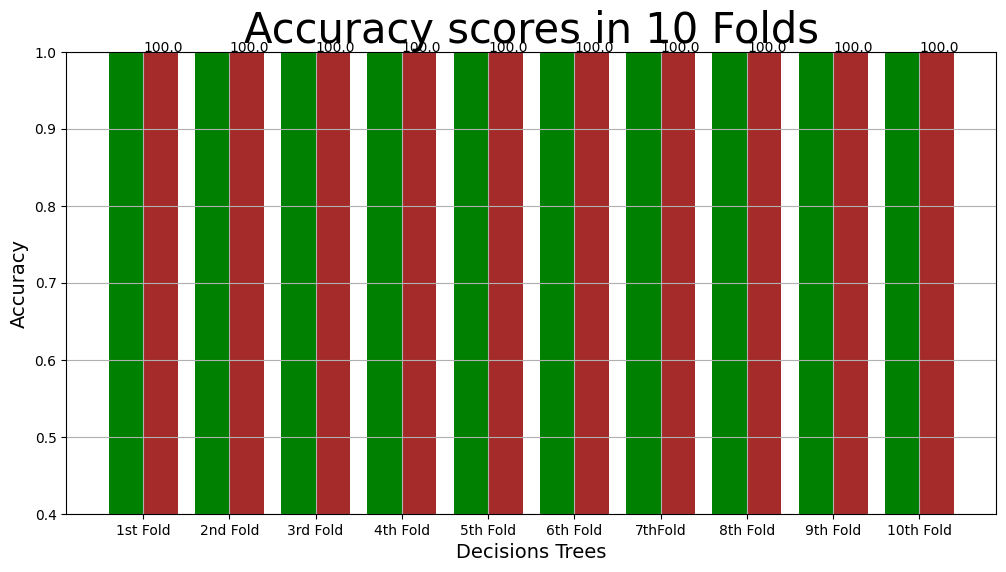

In [28]:

model_name = "Decisions Trees"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 10 Folds",
            Decision_trees_results["Training Accuracy scores"],
            Decision_trees_results["Validation Accuracy scores"])

In [29]:
dt_acc=Decision_trees_results["Validation Accuracy scores"]
Dt_final_acc=round((dt_acc.mean()*100), 2)
avg_accuracies.append(Dt_final_acc)

In [148]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
support_vector_machine=Decision_trees_results = cross_validation(classifier, X_train, y_train, 10)

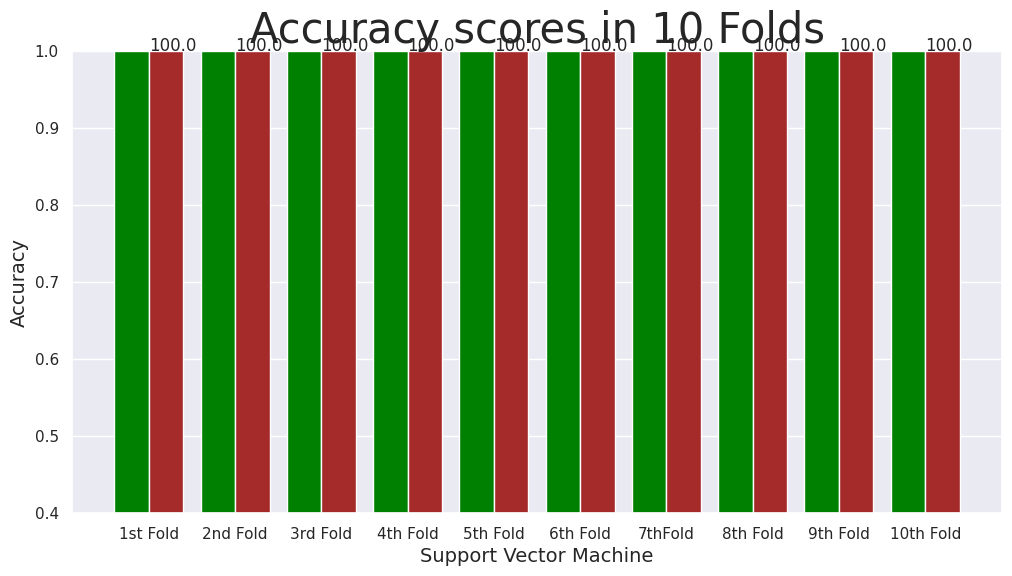

In [149]:
model_name = "Support Vector Machine"
plot_result(model_name,
            "Accuracy",
            "Accuracy scores in 10 Folds",
            support_vector_machine["Training Accuracy scores"],
            support_vector_machine["Validation Accuracy scores"])

In [36]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [37]:

# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

import numpy as np
import pandas as pd
import tensorflow as tf
print(tf.__version__)

import gc
import datetime
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from sklearn.metrics import f1_score
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Activation
import keras.backend as K
import csv
import seaborn as sns
import sklearn.metrics
from keras import losses
import matplotlib.pyplot as pltMath
import sklearn.preprocessing as preproc
import sklearn as sk
from sklearn.utils.class_weight import compute_class_weight
import matplotlib.pyplot as mat
from sklearn.model_selection import KFold
#import tensorflow.compat.v1 as tf
tf.version
#tf.disable_v2_behavior()



import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

2.12.0


In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as pyo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
import keras
from keras.layers import Conv2D, Conv1D, MaxPooling2D, MaxPooling1D, Flatten, BatchNormalization, Dense, Dropout
from keras.utils.np_utils import to_categorical
from keras.models import Sequential


In [39]:
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [40]:
def f1(y_true, y_pred):
    y_pred = K.round(y_pred)
    tp = K.sum(K.cast(y_true*y_pred, 'float'), axis=0)
    tn = K.sum(K.cast((1-y_true)*(1-y_pred), 'float'), axis=0)
    fp = K.sum(K.cast((1-y_true)*y_pred, 'float'), axis=0)
    fn = K.sum(K.cast(y_true*(1-y_pred), 'float'), axis=0)

    p = tp / (tp + fp + K.epsilon())
    r = tp / (tp + fn + K.epsilon())

    f1 = 2*p*r / (p+r+K.epsilon())
    f1 = tf.where(tf.math.is_nan(f1), tf.zeros_like(f1), f1)
    return K.mean(f1)

In [41]:
def readDataSets():


    dataSetDdos = pd.read_csv(filepath_or_buffer = '/content/mydrive/MyDrive/Notes/summer-23/threat_intel/Project/Malware-classifaction/dataset/Ddos attack data set.csv', low_memory = False)

    dataSetRawLoad = pd.concat([ dataSetDdos])

    dataSetModified = pd.get_dummies(data = dataSetRawLoad,columns = [' Label'],dtype = float, drop_first = False) #one hot encoding в деле

    allAttacksType = dataSetModified.columns[infoColumnsAmount:]
    allAttacksTypeCorrected = []
    for attackType in allAttacksType:
        allAttacksTypeCorrected.append(attackType[7:])
    labelsAmountGlobal = len(allAttacksType)
    print(datetime.datetime.now(), "File read finished ^_^")

    return (dataSetModified.to_numpy(dtype = float), allAttacksTypeCorrected)

In [42]:
def prepareDataSet(dataSet):

    dataSet = np.nan_to_num(dataSet)
    np.random.shuffle(dataSet)


    dataSetOverall = np.concatenate((preproc.normalize(dataSet[:,:infoColumnsAmount], norm='l2'), dataSet[:,infoColumnsAmount:]), axis = 1)#np.concatenate((scaler.transform(dataSet[:,:infoColumnsAmount]), dataSet[:,infoColumnsAmount:]), axis = 1 )
    print(datetime.datetime.now(), "Scaling finished ^_^")

    overallLen = len(dataSetOverall)
    dataAmountToTrain = int(0.8 * overallLen)
    dataAmountToPredict = int(0.2 * overallLen)

    dataSetTrain = dataSetOverall[:dataAmountToTrain,:]
    dataSetPredict = dataSetOverall[(dataAmountToTrain + 1):,:]

    print(datetime.datetime.now(), "DataSet prepared ^_^")

    return (dataSetTrain, dataSetPredict)

In [45]:
df = pd.read_csv('/content/mydrive/MyDrive/Aksoy_Folder/dataset.csv')

<ipython-input-45-204d4870a06f>:1: DtypeWarning:

Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.



In [46]:
df = pd.concat([df])

In [47]:
df.head(2)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd PSH Flags,Bwd PSH Flags,...,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78
0,54865,3,2,0,12,0,6,6,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,55054,109,1,1,6,6,6,6,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
print('Number of Rows (Samples): %s' % str((df.shape[0])))
print('Number of Columns (Features): %s' % str((df.shape[1])))

Number of Rows (Samples): 10537
Number of Columns (Features): 79


In [49]:
df.columns

Index([' Destination Port', ' Flow Duration', ' Total Fwd Packets',
       ' Total Backward Packets', 'Total Length of Fwd Packets',
       ' Total Length of Bwd Packets', ' Fwd Packet Length Max',
       ' Fwd Packet Length Min', 'Fwd PSH Flags', ' Bwd PSH Flags',
       ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length',
       ' Bwd Header Length', 'FIN Flag Count', ' SYN Flag Count',
       ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count',
       ' URG Flag Count', ' CWE Flag Count', ' ECE Flag Count',
       ' Down/Up Ratio', ' Fwd Header Length.1', 'Fwd Avg Bytes/Bulk',
       ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk',
       ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate', 'Subflow Fwd Packets',
       ' Subflow Fwd Bytes', ' Subflow Bwd Packets', ' Subflow Bwd Bytes',
       'Init_Win_bytes_forward', ' Init_Win_bytes_backward',
       ' act_data_pkt_fwd', ' min_seg_size_forward', ' Label', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10537 entries, 0 to 10536
Data columns (total 79 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    Destination Port             10537 non-null  int64  
 1    Flow Duration                10537 non-null  int64  
 2    Total Fwd Packets            10537 non-null  int64  
 3    Total Backward Packets       10537 non-null  int64  
 4   Total Length of Fwd Packets   10537 non-null  int64  
 5    Total Length of Bwd Packets  10537 non-null  int64  
 6    Fwd Packet Length Max        10537 non-null  int64  
 7    Fwd Packet Length Min        10537 non-null  int64  
 8   Fwd PSH Flags                 10537 non-null  float64
 9    Bwd PSH Flags                10537 non-null  float64
 10   Fwd URG Flags                10537 non-null  int64  
 11   Bwd URG Flags                10537 non-null  int64  
 12   Fwd Header Length            10537 non-null  float64
 13   

In [51]:
df[' Label'].value_counts()

BENIGN    5005
DDoS      4778
6          522
0          232
Name:  Label, dtype: int64

In [52]:
df = df.drop(df.loc[df[' Label'] == 'Benign'].sample(frac = 0.7).index)

In [53]:
cleaned_data = df.dropna()
cleaned_data.isna().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

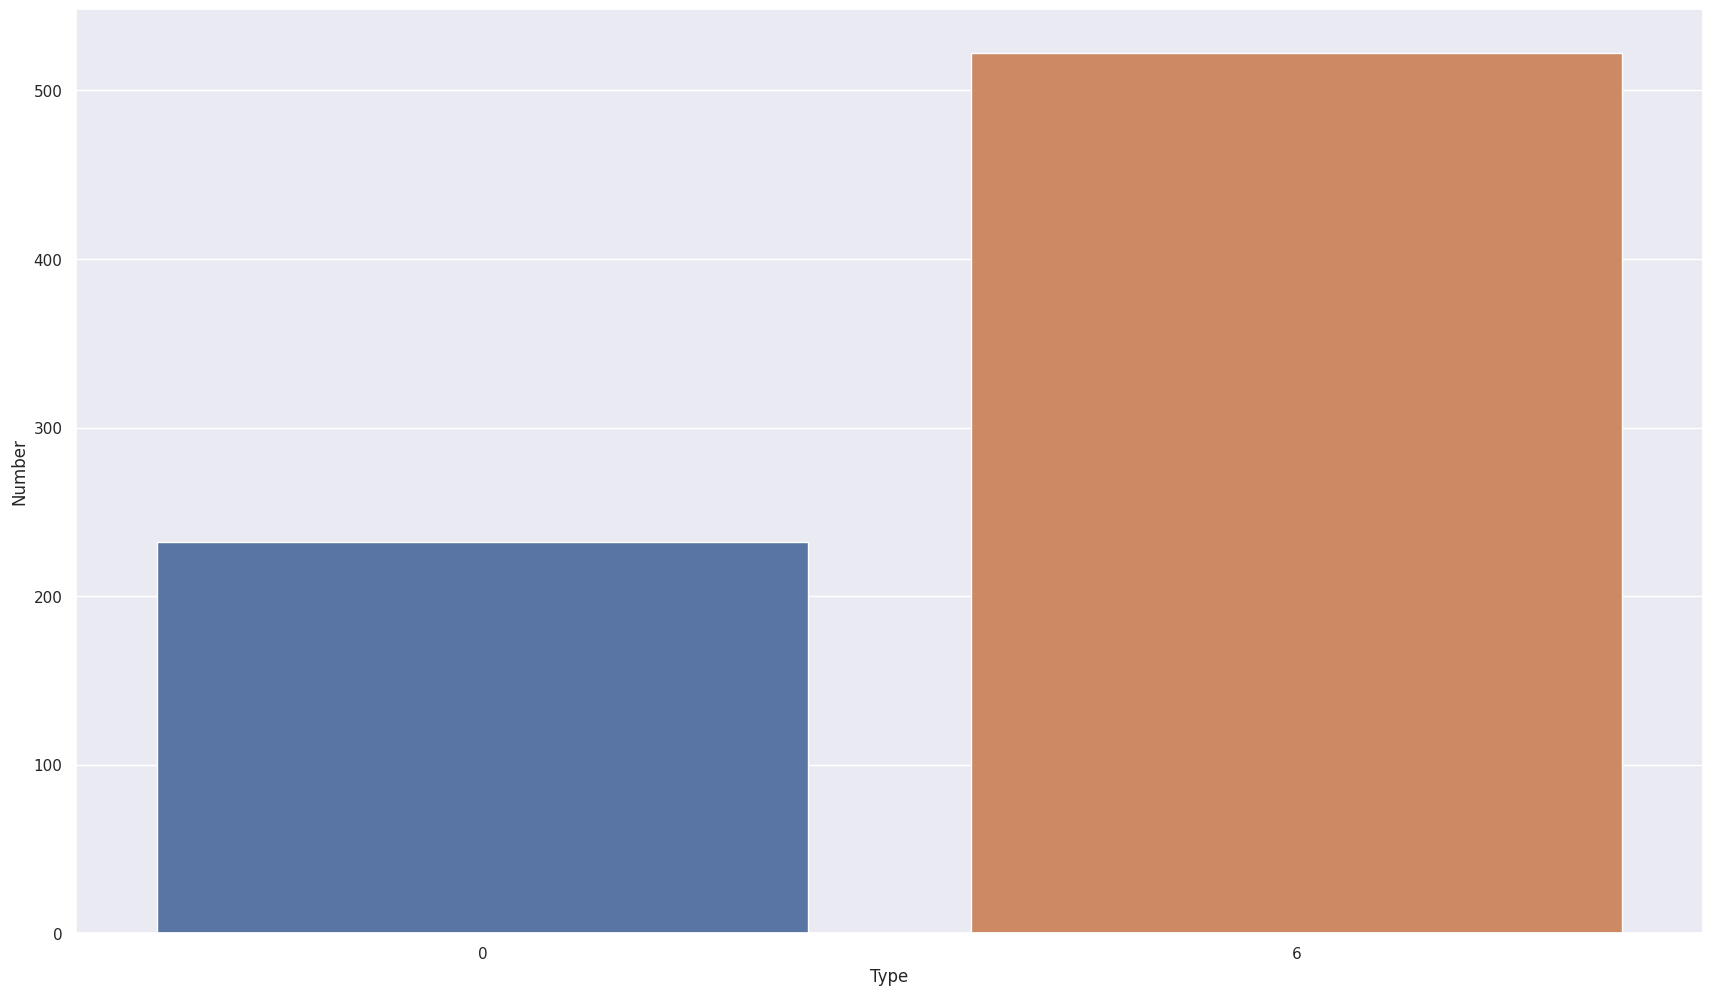

In [54]:
sns.set(rc = {'figure.figsize' : (21,12)})
ax = sns.countplot(x = ' Label', data = cleaned_data)
ax.set(xlabel = 'Type', ylabel = 'Number')
plt.show()

In [55]:
label_encoder = LabelEncoder()
cleaned_data[' Label']= label_encoder.fit_transform(cleaned_data[' Label'])
cleaned_data[' Label'].unique()

<ipython-input-55-e19af89f0e2d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



array([0, 1])

In [56]:
# check for encoded labels
cleaned_data[' Label'].value_counts()

1    522
0    232
Name:  Label, dtype: int64

In [57]:
# make 3 seperate datasets for 3 feature labels
data_1 = cleaned_data[cleaned_data[' Label'] == 0]
data_2 = cleaned_data[cleaned_data[' Label'] == 1]

# make benign feature
y_1 = np.zeros(data_1.shape[0])
y_benign = pd.DataFrame(y_1)

# make portscan feature
y_2 = np.ones(data_2.shape[0])
y_pc = pd.DataFrame(y_2)


# merging the original dataframe
X = pd.concat([data_1, data_2], sort=True)
y = pd.concat([y_benign, y_pc], sort=True)

In [58]:
y_1, y_2

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [59]:
print(X.shape)
print(y.shape)

(754, 79)
(754, 1)


In [60]:

X.isnull().sum().to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [61]:
from sklearn.utils import resample

data_1_resample = resample(data_1, n_samples=150000,
                           random_state=123, replace=True)
data_2_resample = resample(data_2, n_samples=150000,
                           random_state=123, replace=True)

In [62]:
train_dataset = pd.concat([data_1_resample, data_2_resample])
train_dataset.head(2)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd PSH Flags,Bwd PSH Flags,...,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74,Unnamed: 75,Unnamed: 76,Unnamed: 77,Unnamed: 78
9958,80,498680,3,5,26,11601,20,0,8.666667,10.263203,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS
9992,80,1426590,3,5,26,11607,20,0,8.666667,10.263203,...,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,DDoS


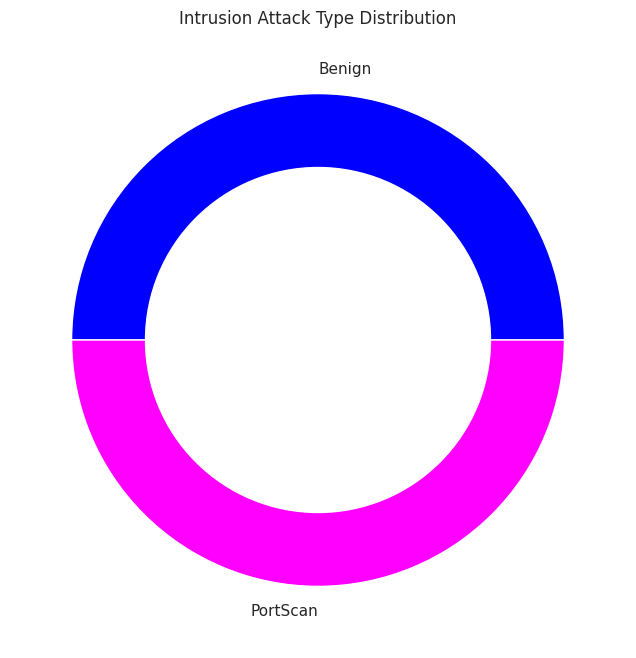

In [63]:

plt.figure(figsize=(10, 8))
circle = plt.Circle((0, 0), 0.7, color='white')
plt.title('Intrusion Attack Type Distribution')
plt.pie(train_dataset[' Label'].value_counts(), labels=['Benign', 'PortScan'], colors=['blue', 'magenta'])
p = plt.gcf()
p.gca().add_artist(circle)

In [64]:
test_dataset = train_dataset.sample(frac=0.2)
target_train = train_dataset[' Label']
target_test = test_dataset[' Label']
target_train.unique(), target_test.unique()

(array([0, 1]), array([0, 1]))

In [65]:
y_train = to_categorical(target_train, num_classes=2)
y_test = to_categorical(target_test, num_classes=2)

In [66]:
# making train & test splits
X_train = train_dataset.iloc[:, :-1].values
X_test = test_dataset.iloc[:, :-1].values
X_test

array([[8.0000000e+01, 8.5954340e+06, 8.0000000e+00, ..., 0.0000000e+00,
        6.4443740e+06, 6.4443740e+06],
       [8.0000000e+01, 1.0696742e+07, 5.0000000e+00, ..., 0.0000000e+00,
        1.0700000e+07, 1.0700000e+07],
       [8.0000000e+01, 8.7057030e+06, 4.0000000e+00, ..., 0.0000000e+00,
        8.7047900e+06, 8.7047900e+06],
       ...,
       [8.0000000e+01, 6.0607000e+04, 3.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [8.0000000e+01, 1.8254670e+06, 3.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [8.0000000e+01, 7.8178000e+04, 3.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]])

In [67]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(300000, 78)
(60000, 78)
(300000, 2)
(60000, 2)


In [68]:
# reshape the data for CNN
X_train = X_train.reshape(len(X_train), X_train.shape[1], 1)
X_test = X_test.reshape(len(X_test), X_test.shape[1], 1)
X_train.shape, X_test.shape

((300000, 78, 1), (60000, 78, 1))

In [69]:
# making the deep learning function
def model():
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(78, 1)))
    model.add(BatchNormalization())

    # adding a pooling layer
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(78, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Conv1D(filters=64, kernel_size=6, activation='relu',
                    padding='same', input_shape=(78, 1)))
    model.add(BatchNormalization())
    model.add(MaxPooling1D(pool_size=(3), strides=2, padding='same'))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(2, activation='softmax'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [70]:
model = model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 78, 64)            448       
                                                                 
 batch_normalization (BatchN  (None, 78, 64)           256       
 ormalization)                                                   
                                                                 
 max_pooling1d (MaxPooling1D  (None, 39, 64)           0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 39, 64)            24640     
                                                                 
 batch_normalization_1 (Batc  (None, 39, 64)           256       
 hNormalization)                                                 
                                                        

In [71]:
from keras.callbacks import CSVLogger, ModelCheckpoint
logger = CSVLogger('logs.csv', append=True)
his = model.fit(X_train, y_train, epochs=1, batch_size=32,
          validation_data=(X_test, y_test), callbacks=[logger])

9375/9375 [==============================] - 280s 29ms/step - loss: 3.2074e-04 - accuracy: 0.9999 - val_loss: 8.3241e-10 - val_accuracy: 1.0000


In [72]:
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1] * 100))

model.save("model.h5")
print("Saved model to disk")

1875/1875 [==============================] - 14s 8ms/step - loss: 8.3241e-10 - accuracy: 1.0000
accuracy: 100.00%
Saved model to disk


In [117]:
scores = model.evaluate(X_test, y_test)
v = scores[1] * 100


1875/1875 [==============================] - 16s 9ms/step - loss: 8.3241e-10 - accuracy: 1.0000


In [136]:
avg_accuracies

[98.14, 97.77, 94.96]

In [137]:
def plot_result(x_label, y_label, plot_title, avg_accuracies):

        plt.figure(figsize=(12,6))
        labels = ["Decision Trees", "SVM", "Neural nets"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()

        plt.bar(X_axis-0, avg_accuracies, 0.5, color='blue', label='Fold Accuracies')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        rects = ax.patches
        plt.grid(True)
        labels = avg_accuracies
        for rect, label in zip(rects, labels):
          height = rect.get_height()
          ax.text(
        rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom"
    )
        plt.show()

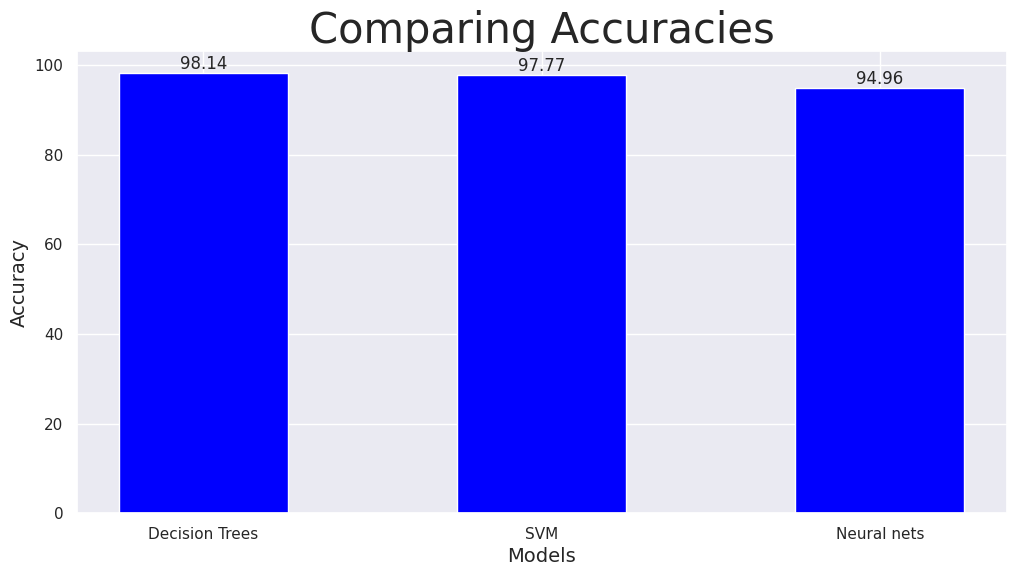

In [138]:
plot_result("Models",
            "Accuracy",
            "Comparing Accuracies",
            avg_accuracies
)